<h1 style="text-align:center;"> YouTube & Spotify Music Data Analysis</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"Spotify_Youtube - Spotify_Youtube.csv.csv")

## Data Cleaning & Preparation

Before performing any analysis, the dataset was cleaned to ensure accuracy and consistency.  
Key steps included:

- **Removing irrelevant columns** that were not required for the analysis.
- **Handling missing values** by removing rows with null entries to maintain data quality.
- Ensuring correct **data types** for numerical and categorical variables.

This preprocessing ensures that the analysis is based on reliable and relevant data.

In [3]:
data.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [5]:
data.drop(columns=['Unnamed: 0','Url_spotify','Uri', 'Url_youtube'], inplace=True)

In [6]:
data.isna().sum()

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         990
Licensed            470
official_video      470
Stream              576
dtype: int64

In [7]:
data["Likes"]=data["Likes"].fillna(0)
data["Comments"]=data["Comments"].fillna(0)

In [8]:
data.dropna(inplace=True)

In [9]:
data.isna().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Description         0
Licensed            0
official_video      0
Stream              0
dtype: int64

## Total Views By Each Artist
This section visualizes the **total YouTube view count** for every artist in the dataset.  
By aggregating views across all songs or albums per artist, we can identify the most popular artists and compare their reach.  

In [10]:
artist_grped=data.groupby("Artist")["Views"].sum()
artist_grped

Artist
$NOT              1.107849e+08
$uicideboy$       3.317202e+08
(G)I-DLE          1.754954e+09
*NSYNC            1.027833e+09
070 Shake         9.609936e+07
                      ...     
will.i.am         2.830801e+09
Ángela Aguilar    1.385295e+09
Ñejo              6.266808e+08
Ñengo Flow        8.127263e+08
Øneheart          3.462331e+07
Name: Views, Length: 2040, dtype: float64

In [11]:
artist_sorted=artist_grped.sort_values(ascending=False)
artist_sorted.head(10)

Artist
Ed Sheeran                 1.546021e+10
CoComelon                  1.460167e+10
Katy Perry                 1.312063e+10
Charlie Puth               1.216759e+10
Luis Fonsi                 1.162798e+10
Justin Bieber              1.099079e+10
Daddy Yankee               1.086828e+10
Bruno Mars                 1.023184e+10
Macklemore & Ryan Lewis    1.012206e+10
Coldplay                   9.997278e+09
Name: Views, dtype: float64

##  Top 10 Most Streamed Tracks
  
This helps identify which songs have the strongest audience engagement on streaming platforms.


In [12]:
x=data[["Track","Stream"]]
x

,Track,Stream
0,Feel Good Inc.,1.040235e+09
1,Rhinestone Eyes,3.100837e+08
2,New Gold (feat. Tame Impala and Bootie Brown),6.306347e+07
3,On Melancholy Hill,4.346636e+08
4,Clint Eastwood,6.172597e+08
...,...,...
20713,JUST DANCE HARDSTYLE,9.227144e+06
20714,SET FIRE TO THE RAIN HARDSTYLE,1.089818e+07
20715,OUTSIDE HARDSTYLE SPED UP,6.226110e+06
20716,ONLY GIRL HARDSTYLE,6.873961e+06


In [13]:
most_streamed_track=x.sort_values(by="Stream", ascending=False).head(10)
most_streamed_track

,Track,Stream
15250,Blinding Lights,3.386520e+09
12452,Shape of You,3.362005e+09
19186,Someone You Loved,2.634013e+09
17937,rockstar (feat. 21 Savage),2.594927e+09
17445,Sunflower - Spider-Man: Into the Spider-Verse,2.538330e+09
17938,Sunflower - Spider-Man: Into the Spider-Verse,2.538330e+09
13503,One Dance,2.522432e+09
16099,Closer,2.456205e+09
16028,Closer,2.456205e+09
14030,Believer,2.369272e+09


In [14]:
Least_streamed_track=x.sort_values(by="Stream", ascending=True).head(5)
Least_streamed_track

,Track,Stream
8701,Rainbows,6574.0
3774,We Play the Funk - Slynk Remix,7771.0
5161,Teil 9 - Sherlock Holmes und ein Brief von der...,8053.0
5160,Teil 10 - Sherlock Holmes und ein Brief von de...,8074.0
5159,Teil 5 - Sherlock Holmes und der blinde Bettle...,10306.0


## Distribution of Album Types

The pie chart below shows the proportion of different album types in the dataset.  
This provides insights into the variety of content being produced and released.


In [15]:
data.head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.177,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09


In [16]:
data["Album_type"].unique()

array(['album', 'single', 'compilation'], dtype=object)

In [17]:
album_type=data["Album_type"].value_counts()
album_type

Album_type
album          13860
single          4647
compilation      682
Name: count, dtype: int64

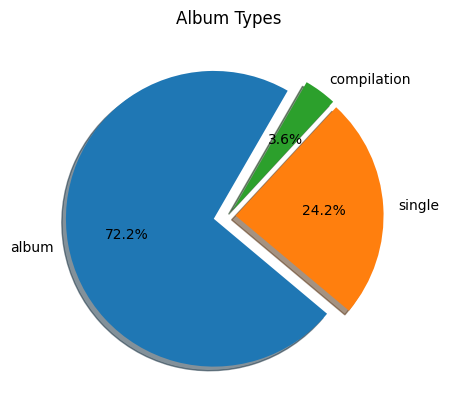

In [18]:
plt.pie(album_type, labels=album_type.index, autopct="%1.1f%%",explode=[0.1,0.05,0.05], startangle=60, shadow=True)
plt.title("Album Types")
plt.show()

## Analysis of Engagement Metrics by Album Type

This section presents a comparative analysis of **YouTube Views**, **Likes**, and **Comments** for different album types.  
The objective is to identify which album categories generate the highest audience engagement across these metrics.  

In [19]:
data_albums=data.groupby("Album_type")[["Views", "Likes", "Comments"]].mean()
data_albums

,Views,Likes,Comments
Album_type,,,
album,1.020575e+08,676764.848918,29216.231313
compilation,8.615471e+07,551640.642229,18323.741935
single,8.491714e+07,723187.859049,27347.638692


In [20]:
data_albums=data_albums.reset_index()

In [21]:
albums_melted=pd.melt(data_albums, id_vars="Album_type",var_name="Attribute", value_name="Total")
albums_melted

,Album_type,Attribute,Total
0,album,Views,1.020575e+08
1,compilation,Views,8.615471e+07
2,single,Views,8.491714e+07
3,album,Likes,6.767648e+05
4,compilation,Likes,5.516406e+05
5,single,Likes,7.231879e+05
6,album,Comments,2.921623e+04
7,compilation,Comments,1.832374e+04
8,single,Comments,2.734764e+04


<Axes: xlabel='Album_type', ylabel='Total'>

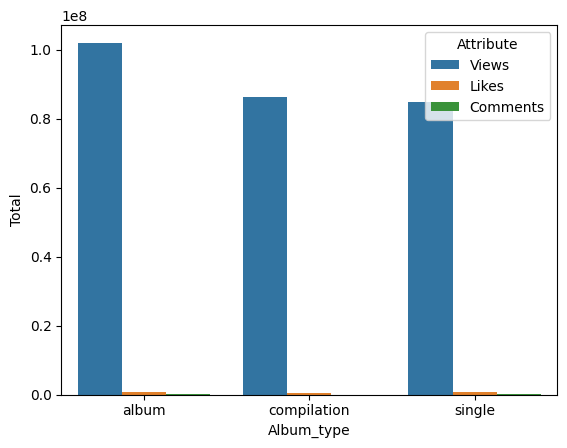

In [22]:
sns.barplot(data=albums_melted, x="Album_type",y="Total", hue="Attribute")

## Top 5 Channels by Total Views

The chart below shows the five channels with the highest total views,helping identify the most popular content creators in the dataset.


In [23]:
data.head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.177,0.00836,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09


In [24]:
data_channels=data.groupby("Channel")["Views"].sum().sort_values(ascending=False).head()
data_channels

Channel
T-Series            4.796159e+10
LuisFonsiVEVO       2.170252e+10
CalvinHarrisVEVO    1.828114e+10
Macklemore          1.700341e+10
Ed Sheeran          1.691822e+10
Name: Views, dtype: float64

In [25]:
data_channels=data_channels.reset_index()

Text(0.5, 1.0, 'Top 5 Channels by Views')

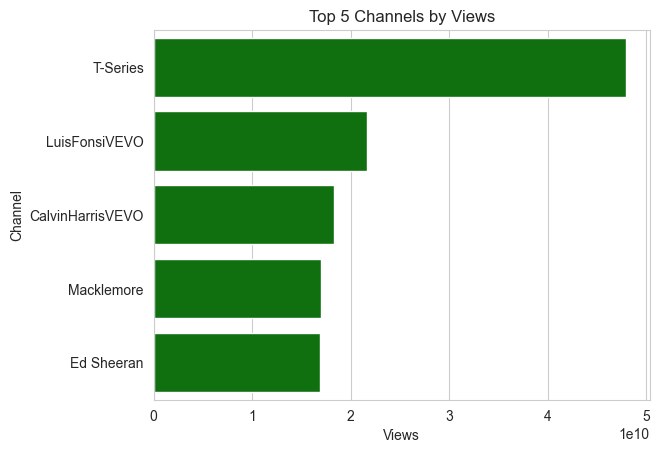

In [26]:
sns.set_style("whitegrid")
sns.barplot( data=data_channels, x="Views", y="Channel",color="green")
plt.title("Top 5 Channels by Views")

## Most Viewed Track

This section highlights the single track with the highest number of views, showing the peak-performing content in the dataset.


In [27]:
data.sort_values(by = "Views", ascending=False).head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
1147,Luis Fonsi,Despacito,VIDA,album,0.655,0.797,2.0,-4.787,0.153,0.198,...,229360.0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,8.079649e+09,50788652.0,4252791.0,“Despacito” disponible ya en todas las platafo...,True,True,1.506598e+09


## Likes-to-Views Ratio for Tracks

This metric measures engagement by comparing the number of likes to the total views for each track, indicating which tracks have a more engaged audience relative to their view count.


In [28]:
data["LV_ratio"]=data["Likes"]/data["Views"]

In [29]:
data.head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,LV_ratio
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.177,0.00836,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09,0.00897


In [30]:
data[["Track", "LV_ratio"]].sort_values(by= "LV_ratio", ascending=False).head(7)

,Track,LV_ratio
19968,Intro,0.249204
19969,Safety Zone,0.232460
19967,Future,0.211869
19971,Pandora's Box,0.200518
16297,My Universe - Galantis Remix,0.179633
15065,Burn It (feat. MAX),0.178525
8105,No.2 (with parkjiyoon),0.168991


## Top 5 Albums by Danceability

Danceability indicates how suitable a track is for dancing based on a combination of musical elements such as tempo, rhythm stability, beat strength, and overall regularity.  
Here we identify the top 5 albums with the highest sum danceability.

In [31]:
data.head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,LV_ratio
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.177,0.00836,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09,0.00897


In [32]:
data.groupby("Album")["Danceability"].sum().sort_values(ascending=False).head()

Album
Greatest Hits                                  16.711
Hamilton (Original Broadway Cast Recording)    16.610
HEROES & VILLAINS                              14.300
RODZINNY BIZNES                                13.491
An Evening With Silk Sonic                     13.349
Name: Danceability, dtype: float64

## Album Views & Streams Analysis
Comparing the average **YouTube Views** and **Spotify Streams** for each album.

In [39]:
data.head(1)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,LV_ratio
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.177,0.00836,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09,0.00897


In [40]:
al_vist = (
    data.groupby("Album")[["Views", "Stream"]]
    .mean()
    .assign(Total=lambda x: x["Views"] + x["Stream"])
    .sort_values(by="Total", ascending=False)
).head()

al_vist=al_vist.drop("Total", axis=1)
al_vist

,Views,Stream
Album,,
See You Again (feat. Charlie Puth),5.773798e+09,1.521255e+09
Uptown Special,4.821016e+09,1.653820e+09
÷ (Deluxe),3.222213e+09,2.278534e+09
All The Little Lights,3.376086e+09,1.785368e+09
Gangnam Style (강남스타일),4.679767e+09,3.709911e+08


In [42]:
al_vist=al_vist.reset_index()

In [43]:
al_melted=pd.melt(al_vist, id_vars="Album",var_name="Platform", value_name="Total")
al_melted

,Album,Platform,Total
0,See You Again (feat. Charlie Puth),Views,5.773798e+09
1,Uptown Special,Views,4.821016e+09
2,÷ (Deluxe),Views,3.222213e+09
3,All The Little Lights,Views,3.376086e+09
4,Gangnam Style (강남스타일),Views,4.679767e+09
5,See You Again (feat. Charlie Puth),Stream,1.521255e+09
6,Uptown Special,Stream,1.653820e+09
7,÷ (Deluxe),Stream,2.278534e+09
8,All The Little Lights,Stream,1.785368e+09
9,Gangnam Style (강남스타일),Stream,3.709911e+08


In [44]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'AppleGothic'

<Axes: xlabel='Total', ylabel='Album'>

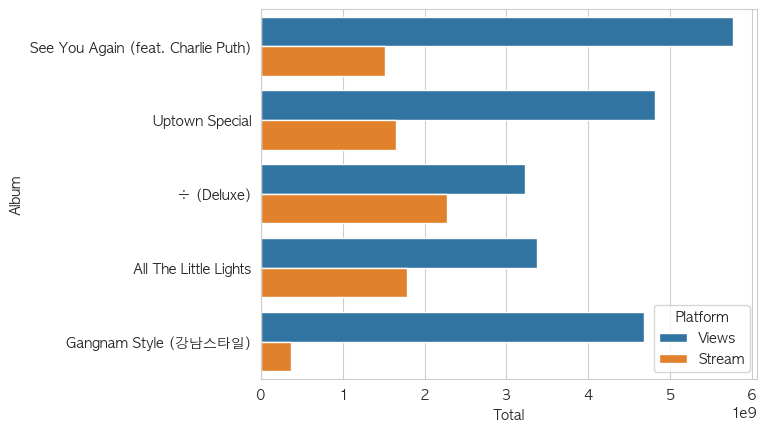

In [45]:
sns.barplot(data=al_melted, y="Album", x="Total", hue="Platform")

## Relationship Between Likes, Views, Comments, and Streams

We explore how audience engagement metrics are interrelated.  
- **Likes vs Views**: Measures engagement rate.  
- **Comments vs Views**: Indicates discussion level.  
- **Streams**: Represents Spotify performance.

We use a correlation heatmap for numerical relationships and  
a pairplot for visual patterns.


In [34]:
data_lvcs=data[["Likes", "Views", "Comments", "Stream"]]
data_lvcs

,Likes,Views,Comments,Stream
0,6220896.0,693555221.0,169907.0,1.040235e+09
1,1079128.0,72011645.0,31003.0,3.100837e+08
2,282142.0,8435055.0,7399.0,6.306347e+07
3,1788577.0,211754952.0,55229.0,4.346636e+08
4,6197318.0,618480958.0,155930.0,6.172597e+08
...,...,...,...,...
20713,1113.0,71678.0,0.0,9.227144e+06
20714,2019.0,164741.0,0.0,1.089818e+07
20715,329.0,35646.0,0.0,6.226110e+06
20716,88.0,6533.0,0.0,6.873961e+06


In [35]:
coorelation_matrix=data_lvcs.corr()
coorelation_matrix

,Likes,Views,Comments,Stream
Likes,1.000000,0.891629,0.631019,0.655878
Views,0.891629,1.000000,0.430978,0.603548
Comments,0.631019,0.430978,1.000000,0.267793
Stream,0.655878,0.603548,0.267793,1.000000


<Axes: >

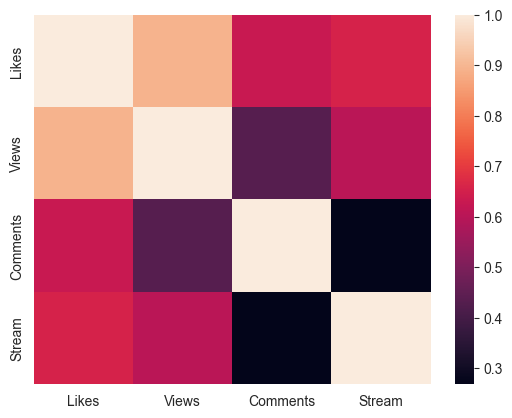

In [37]:
sns.heatmap(coorelation_matrix)